# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr

# Step 2 - Load and prepare hazard data
Use xarray to load hazard data.\
If this data is not a two-dimensional array, perform your desired selection or calculation (eg mean, min, max, percentile) to reduce data to 2D.

In [3]:
# load some dataset
# for example, here we load BARPA rainfall data
filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
ds


<xarray.Dataset> Size: 2MB
Dimensions:   (lat: 691, lon: 886)
Coordinates:
  * lat       (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon       (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
    quantile  float64 8B ...
Data variables:
    HWAtx     (lat, lon) float32 2MB ...
Attributes:
    description:             50th percentile of inter-model spread of: maximu...
    models:                  ['MPI-ESM1-2-HR-BARPA-R', 'EC-Earth3-BARPA-R', '...
    pathway:                 ssp370
    GWL:                     GWL 1.2 degC
    bias_correction_method:  ACS-QME
    contact:                 Mitchell Black (mitchell.black@bom.gov.au)
    code:                    https://github.com/AusClimateService/hazards-heat
    history:                 Sat Jun 29 22:01:53 2024: /g/data/hh5/public/app...

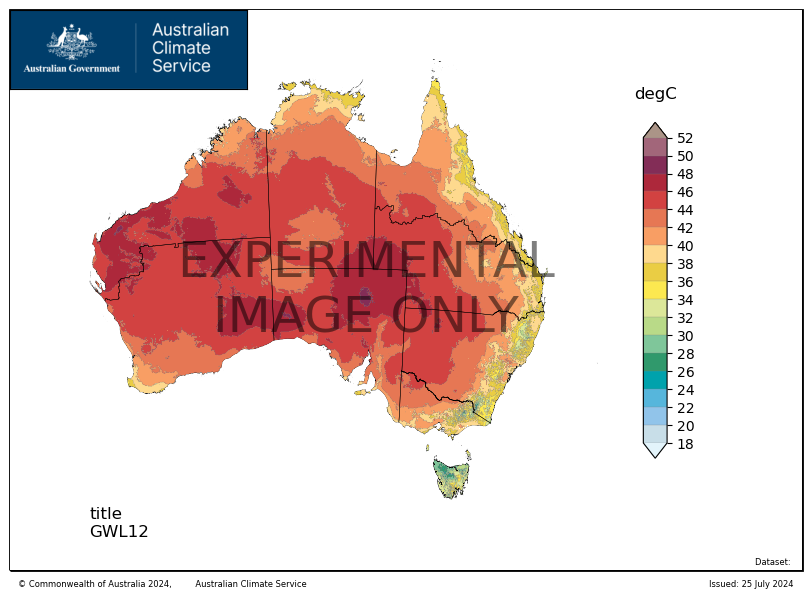

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr

filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
cmap_dict.update({'tasmax' : ListedColormap(colors=['#E3F4FB','#C8DEE8','#91C4EA','#56B6DC','#00A2AC','#30996C','#7FC69A','#B9DA88','#DCE799','#FCE850','#EACD44','#FED98E','#F89E64','#E67754','#D24241','#AD283B','#832D57','#A2667A','#AB9487'],name='tasmax'),})
var = "HWAtx"

plot_acs_hazard(data = ds[var],
                regions = regions_dict['ncra_regions'],
                title = "title",
                date_range = "GWL12",
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "degC",
                cbar_extend = "both",                
                dataset_name = "",
                outfile = "figures/out.png",
               watermark_color="k");

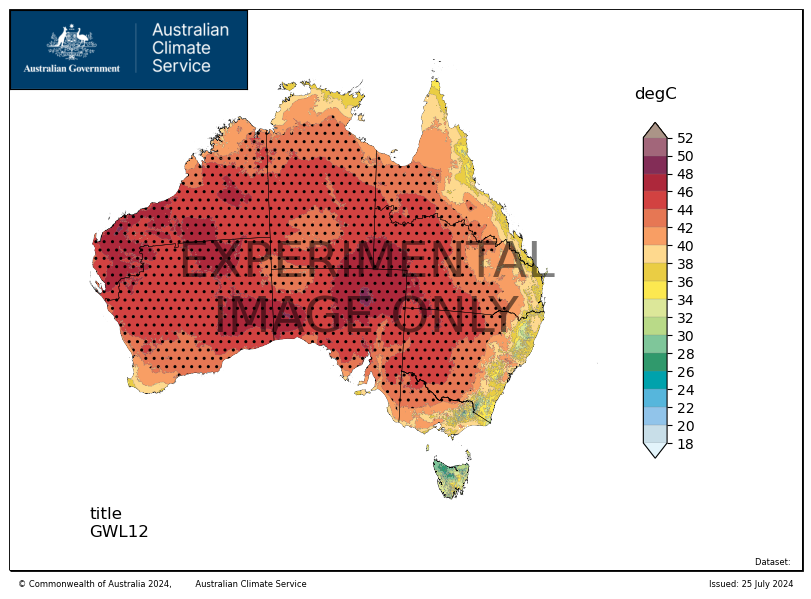

In [5]:
filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
cmap_dict.update({'tasmax' : ListedColormap(colors=['#E3F4FB','#C8DEE8','#91C4EA','#56B6DC','#00A2AC','#30996C','#7FC69A','#B9DA88','#DCE799','#FCE850','#EACD44','#FED98E','#F89E64','#E67754','#D24241','#AD283B','#832D57','#A2667A','#AB9487'],name='tasmax'),})
var = "HWAtx"
stippling_mask = ds[var]>42

plot_acs_hazard(data = ds[var],
                stippling=stippling_mask,
                regions = regions_dict['ncra_regions'],
                title = "title",
                date_range = "GWL12",
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "degC",
                cbar_extend = "both",                
                dataset_name = "",
                outfile = "figures/out.png",
               watermark_color="k");

## Step 4: Calculate NCRA region statistics

In [6]:
# import needed packages
from acs_area_statistics import acs_regional_stats, regions

In [7]:
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = "fractional", 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


!warning very slow! Calculating fractional mask every time is very slow.         
Please consider calculating `mask = regions.mask_3D_frac_approx(ds)` before function.


<xarray.Dataset> Size: 2kB
Dimensions:     (region: 10)
Coordinates:
    quantile    float64 8B 0.5
  * region      (region) int64 80B 0 1 2 3 4 5 6 7 8 9
    abbrevs     (region) <U8 320B 'WANorth' 'WASouth' 'NSW' ... 'QLDSouth' 'AUS'
    names       (region) <U48 2kB 'Western Australia North' ... 'Australia'
Data variables:
    HWAtx_mean  (region) float64 80B 45.06 44.83 42.02 ... 40.94 43.39 43.58
    HWAtx_min   (region) float32 40B 37.44 34.88 25.51 ... 31.03 31.27 23.35
    HWAtx_max   (region) float32 40B 48.87 48.01 46.21 ... 45.41 47.3 48.87

# Access the docstring for more info

In [8]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='aus_states_territories',
    regions=None,
    data=None,
    stippling=None,
    mask_not_australia=True,
    facecolor=None,
    edgecolor='black',
    figsize=(8, 6),
    title=None,
    date_range='',
    crs=None,
    area_linewidth=0.3,
    xlim=(110, 170),
    ylim=(-45, -5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x15243f99d030>,
    cbar_extend='neither',
    ticks=None,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    label_states=False,
    contourf=False,
    contour=True,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    watermark_color='r',
    infile=None,
    outfile=None,
    savefig=True,
)
Docstring:
This function takes a name of an Australian shapefile collection for data in 
/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/ 
and hazard data from a 2D Xarray data array
and plots the data on a map of Austr

In [9]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds=None,
    infile=None,
    var=None,
    mask=None,
    start=None,
    end=None,
    dims=None,
    how=None,
    outfile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
    bins=None,
    bin_labels=None,
)
Docstring:
This function takes an Xarray dataset (ds) with variable (var)
and multiple dimensions (eg time, lat, and lon),
then selects the time range between two years (start and end),
and applies regions.mask_3D_frac_approx fractional mask (frac)
to compute a regional statistic (how, eg "mean") over two or three dimensions.
Best used with numerical data without nans.

Parameters
----------
ds: xr.Dataset or xr.DataArray
    expects an xr.Dataset with variable var and dimensions time, lat, and lon.

infile: str
    NetCDF file to read in as xr.Dataset

var: str
    name of variable in ds, eg "pr" or "tas".
    If None, then tries to infer the var name from the data

mask:  xarray.DataArray 'mask' or ["fractional"